In [0]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Question 1:

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


#Question 2:

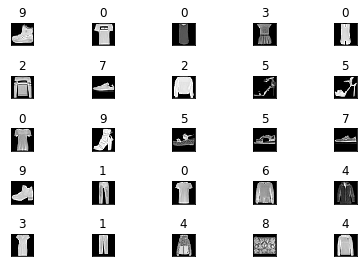

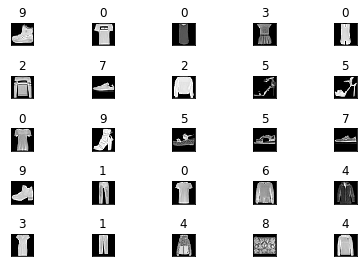

In [0]:
fig = plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

#Question 3:

In [0]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

#Question 4:

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=1000,
          epochs=30)

Epoch 1/30
60000/60000 [==============================] - 1s 18us/step - loss: 11.5453 - acc: 0.2817
Epoch 2/30
60000/60000 [==============================] - 1s 12us/step - loss: 11.3712 - acc: 0.2942
Epoch 3/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3532 - acc: 0.2954
Epoch 4/30
60000/60000 [==============================] - 1s 12us/step - loss: 11.3514 - acc: 0.2955
Epoch 5/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3402 - acc: 0.2962
Epoch 6/30
60000/60000 [==============================] - 1s 12us/step - loss: 11.3508 - acc: 0.2955
Epoch 7/30
60000/60000 [==============================] - 1s 12us/step - loss: 11.3373 - acc: 0.2964
Epoch 8/30
60000/60000 [==============================] - 1s 12us/step - loss: 11.3451 - acc: 0.2959
Epoch 9/30
60000/60000 [==============================] - 1s 12us/step - loss: 11.3501 - acc: 0.2956
Epoch 10/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3371 - a

#Question 5:

In [0]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= (28,28,1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(X_train, Y_train,
          batch_size=1000,
          epochs=30)

Epoch 1/30
60000/60000 [==============================] - 1s 19us/step - loss: 13.1803 - acc: 0.1800
Epoch 2/30
60000/60000 [==============================] - 1s 13us/step - loss: 13.1045 - acc: 0.1865
Epoch 3/30
60000/60000 [==============================] - 1s 13us/step - loss: 12.9072 - acc: 0.1984
Epoch 4/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.4379 - acc: 0.2900
Epoch 5/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.4018 - acc: 0.2921
Epoch 6/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3963 - acc: 0.2925
Epoch 7/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.4138 - acc: 0.2913
Epoch 8/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3932 - acc: 0.2926
Epoch 9/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3894 - acc: 0.2930
Epoch 10/30
60000/60000 [==============================] - 1s 13us/step - loss: 11.3812 - a

In [0]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


#Question 6:

In [0]:
model.save('my_model.h5')

In [0]:
new_model = keras.models.load_model('my_model.h5')

In [0]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 89.15%


#Question 7:

In [0]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10000/10000 [==============================] - 0s 43us/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.91      0.89      0.90      1000
           4       0.79      0.81      0.80      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.74      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [0]:
 from sklearn.metrics import confusion_matrix
 C = confusion_matrix(y_test, y_pred_bool)
 C

array([[824,   3,  20,  16,   2,   1, 127,   0,   6,   1],
       [  5, 977,   3,  10,   1,   0,   1,   0,   3,   0],
       [ 19,   0, 799,   7, 108,   0,  65,   0,   2,   0],
       [ 13,  11,  22, 889,  34,   0,  28,   0,   3,   0],
       [  1,   1,  90,  24, 809,   0,  73,   0,   2,   0],
       [  1,   0,   0,   0,   0, 974,   0,  14,   0,  11],
       [ 97,   0,  70,  25,  61,   0, 741,   0,   6,   0],
       [  0,   0,   0,   0,   0,  14,   0, 962,   0,  24],
       [  4,   1,   1,   2,   3,   1,   8,   2, 978,   0],
       [  0,   0,   0,   0,   0,   6,   0,  32,   0, 962]])

#Question 8:

In [0]:
misclassification = x_test.shape[0] - np.sum(np.diag(C))

In [0]:
misclassification

1085

#Question 9:

In [0]:
Epochs = [10,30,50]
Batch_Size = [500,1000, 5000] 
Optimizer = ['adam', 'Rmsprop', 'SGD']
dict = {}
for i in Optimizer:
  for j in Epochs:
    for k in Batch_Size:
      model = Sequential()
      model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= (28,28,1)))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Flatten())
      model.add(Dense(128, activation='relu'))
      model.add(Dense(10, activation='softmax'))
      model.compile(optimizer=i,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
      model.fit(X_train, Y_train,
          batch_size=k,
          epochs=j)
      scores = model.evaluate(X_test, Y_test, verbose=0)
      dict[i+str(j)+str(k)] = scores[1]
dict


Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 14.5036 - acc: 0.0999
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 8/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 9/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000
Epoch 10/10
60000/60000 [==============================] - 1s 17us/step - loss: 14.5063 - a

{'Rmsprop101000': 0.1982,
 'Rmsprop10500': 0.2948,
 'Rmsprop105000': 0.2918,
 'Rmsprop301000': 0.1996,
 'Rmsprop30500': 0.8919,
 'Rmsprop305000': 0.8954,
 'Rmsprop501000': 0.1,
 'Rmsprop50500': 0.1,
 'Rmsprop505000': 0.9062,
 'SGD101000': 0.1,
 'SGD10500': 0.1,
 'SGD105000': 0.1,
 'SGD301000': 0.1998,
 'SGD30500': 0.8922,
 'SGD305000': 0.8704,
 'SGD501000': 0.1998,
 'SGD50500': 0.1,
 'SGD505000': 0.1,
 'adam101000': 0.4573,
 'adam10500': 0.1,
 'adam105000': 0.5268,
 'adam301000': 0.8868,
 'adam30500': 0.8967,
 'adam305000': 0.5696,
 'adam501000': 0.9043,
 'adam50500': 0.8965,
 'adam505000': 0.199}

In [0]:
dict

{'Rmsprop101000': 0.1982,
 'Rmsprop10500': 0.2948,
 'Rmsprop105000': 0.2918,
 'Rmsprop301000': 0.1996,
 'Rmsprop30500': 0.8919,
 'Rmsprop305000': 0.8954,
 'Rmsprop501000': 0.1,
 'Rmsprop50500': 0.1,
 'Rmsprop505000': 0.9062,
 'SGD101000': 0.1,
 'SGD10500': 0.1,
 'SGD105000': 0.1,
 'SGD301000': 0.1998,
 'SGD30500': 0.8922,
 'SGD305000': 0.8704,
 'SGD501000': 0.1998,
 'SGD50500': 0.1,
 'SGD505000': 0.1,
 'adam101000': 0.4573,
 'adam10500': 0.1,
 'adam105000': 0.5268,
 'adam301000': 0.8868,
 'adam30500': 0.8967,
 'adam305000': 0.5696,
 'adam501000': 0.9043,
 'adam50500': 0.8965,
 'adam505000': 0.199}